## 对用户用电量进行聚类分析

In [569]:
#导入用户用电量数据
import pandas as pd

data=pd.read_csv("./用户用电量数据/data.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149185 entries, 0 to 149184
Data columns (total 3 columns):
CONS_NO      149185 non-null int64
DATA_DATE    149185 non-null object
KWH          148167 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ MB


In [570]:
#数据预处理，处理成行为用户，列为日期的数据
import numpy as np

k1 = np.array(data[data.CONS_NO==1][["KWH"]])
k2 = np.array(data[data.CONS_NO==1][["DATA_DATE"]])
g = pd.Series(k1.reshape(len(k1),),index=k2.reshape(len(k2),))
df = g.to_frame().T

for i in range(2,201):
    k3 =np.array(data[data.CONS_NO==i][["KWH"]])
    k4 =np.array(data[data.CONS_NO==i][["DATA_DATE"]])
    g_ = pd.Series(k3.reshape(len(k3),),index=k4.reshape(len(k4),))
    df= df.append(g_,ignore_index=True)
a=np.arange(1,201)
df.insert(0,'CONS_NO',a)
# df.T.info()
df

,CONS_NO,2015/1/1,2015/1/2,2015/1/3,2015/1/4,2015/1/5,2015/1/6,2015/1/7,2015/1/8,2015/1/9,...,2017/1/29,2017/1/30,2017/1/31,2017/2/1,2017/2/2,2017/2/3,2017/2/4,2017/2/5,2017/2/6,2017/2/7
0,1,6.68,2.50,5.20,4.17,4.89,5.26,4.11,3.70,3.74,...,2.37,3.12,2.02,1.74,2.53,3.18,3.29,2.77,3.81,3.62
1,2,1.22,0.65,1.14,1.04,1.33,1.02,0.08,0.09,0.09,...,0.97,0.95,0.93,0.92,0.92,1.99,0.96,1.36,1.33,1.40
2,3,7.35,6.65,7.76,4.02,4.68,7.06,6.51,7.00,6.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,0.62,1.92,0.65,1.30,0.71,1.36,0.89,1.24,0.75,...,1.14,1.06,0.96,1.12,0.86,0.76,0.75,1.49,0.86,1.08
4,5,2.58,2.60,2.36,1.83,2.05,1.97,1.98,1.44,2.02,...,2.11,2.58,2.22,1.96,1.71,2.23,2.69,2.27,2.52,2.10
5,6,2.72,2.34,2.79,2.61,2.52,2.52,2.35,2.32,2.28,...,3.71,4.16,3.34,3.60,3.04,3.07,3.18,4.32,3.35,3.32
6,7,0.55,0.57,0.56,0.56,0.60,0.60,2.20,0.82,0.60,...,1.05,0.61,0.58,0.96,0.94,4.23,3.54,2.10,4.53,2.82
7,8,10.98,13.02,13.86,11.51,10.67,11.86,10.26,10.67,11.87,...,1.82,1.80,1.38,1.39,1.39,1.11,1.65,1.37,1.27,1.49
8,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.96,5.05,4.18,4.15,3.38,3.69,3.82,2.85,3.65,4.06
9,10,1.84,2.50,1.91,2.70,2.26,3.35,2.66,2.45,2.45,...,0.00,0.00,0.00,0.00,1.19,0.80,0.72,0.73,1.60,1.29


In [571]:
#利用箱线图法对异常值进行修复，大于上限的设为上限值，小于下限的等于下限值，
#最后写入exam.csv文件中，方便查看：

d2 = df.iloc[:,1:].T
for i in d2.columns:
    iqr = d2.iloc[:,i].quantile(0.75) - d2.iloc[:,i].quantile(0.25)
    q_l = d2.iloc[:,i].quantile(0.25) - 1.5 * iqr
    q_u = d2.iloc[:,i].quantile(0.75) +1.5 * iqr
    for j in range(len(d2.index)):
        if d2.iloc[j,i]<q_l:
                d2.iloc[j,i] = q_l
        if d2.iloc[j,i] > q_u :
                d2.iloc[j,i] = q_u
d3 = pd.concat([df['CONS_NO'],d2.T],axis=1)    
d3.to_csv("./exam.csv",index=False)

In [597]:
#对数据进行缺失值填充，填充均值法
df_q=d3.T.iloc[1:,:]
for i in range(200):
    df_q[i].fillna(df_q[i].mean(),inplace = True)#"inplace=True"重写进入df_q，灰常慢，三分钟。。。。。wait。

In [599]:
df_q.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
180    0
181    0
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    0
192    0
193    0
194    0
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

In [579]:
#另一种姿势对数据进行缺失值填充，填充均值法，仍然很慢
# import numpy as np
# df_q=d3.T.iloc[1:,:]
# df_q.isnull().sum()>0,获取有缺失值的列
# df_q.columns[df_q.isnull().sum()>0]
# mean_val = df[column].mean()，取均值
# for column in list(df_q.columns[df_q.isnull().sum() > 0]):
#     mean_val = df_q[column].mean()
#     df_q[column].fillna(mean_val,inplace=True)#"inplace=True"重写进入df_q，灰常慢，三分钟。。。。。wait。
# df_q

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
2015/1/1,6.68,1.22000,7.35,0.62,2.58,2.72000,0.55,10.98,0.00,1.84000,...,2.26,5.63000,0.23,2.340,1.78,1.87000,0.0000,4.59,4.88,0.0
2015/1/2,2.50,0.65000,6.65,1.92,2.60,2.34000,0.57,13.02,0.00,2.50000,...,3.22,3.77000,0.22,3.290,1.66,1.29000,0.0000,4.86,3.57,0.0
2015/1/3,5.20,1.14000,7.76,0.65,2.36,2.79000,0.56,13.86,0.00,1.91000,...,2.52,3.14000,0.25,1.220,4.32,1.21000,0.0000,4.49,4.72,0.0
2015/1/4,4.17,1.04000,4.02,1.30,1.83,2.61000,0.56,11.51,0.00,2.70000,...,3.65,3.20000,0.22,0.820,3.60,1.52000,0.0000,7.27,3.63,0.0
2015/1/5,4.89,1.33000,4.68,0.71,2.05,2.52000,0.60,10.67,0.00,2.26000,...,2.25,2.81000,0.20,2.520,5.18,1.52000,0.0000,6.55,3.38,0.0
2015/1/6,5.26,1.02000,7.06,1.36,1.97,2.52000,0.60,11.86,0.00,3.35000,...,1.91,4.16000,0.09,2.030,4.31,1.24000,0.0000,5.02,5.10,0.0
2015/1/7,4.11,0.08000,6.51,0.89,1.98,2.35000,2.20,10.26,0.00,2.66000,...,2.20,2.97000,0.07,2.650,3.98,1.27000,0.0000,5.40,4.40,0.0
2015/1/8,3.70,0.09000,7.00,1.24,1.44,2.32000,0.82,10.67,0.00,2.45000,...,0.71,2.44000,0.10,2.470,4.70,1.87000,0.0000,4.51,3.85,0.0
2015/1/9,3.74,0.09000,6.53,0.75,2.02,2.28000,0.60,11.87,0.00,2.45000,...,1.40,3.51000,0.11,0.940,4.46,1.51000,0.0000,5.05,2.51,0.0
2015/1/10,5.83,0.09000,4.94,1.67,2.33,2.34000,0.60,11.13,0.00,2.32000,...,1.83,3.83000,0.21,1.110,4.35,1.00000,0.0000,5.36,3.55,0.0


In [600]:
#填充后查看是否有缺失值
df_new = df_q.T
df_new.insert(0,'CONS_NO',a)
df_new.isnull().sum()#查看是否有缺失值

CONS_NO      0
2015/1/1     0
2015/1/2     0
2015/1/3     0
2015/1/4     0
2015/1/5     0
2015/1/6     0
2015/1/7     0
2015/1/8     0
2015/1/9     0
2015/1/10    0
2015/1/11    0
2015/1/12    0
2015/1/13    0
2015/1/14    0
2015/1/15    0
2015/1/16    0
2015/1/17    0
2015/1/18    0
2015/1/19    0
2015/1/20    0
2015/1/21    0
2015/1/22    0
2015/1/23    0
2015/1/24    0
2015/1/25    0
2015/1/26    0
2015/1/27    0
2015/1/28    0
2015/1/29    0
            ..
2017/1/9     0
2017/1/10    0
2017/1/11    0
2017/1/12    0
2017/1/13    0
2017/1/14    0
2017/1/15    0
2017/1/16    0
2017/1/17    0
2017/1/18    0
2017/1/19    0
2017/1/20    0
2017/1/21    0
2017/1/22    0
2017/1/23    0
2017/1/24    0
2017/1/25    0
2017/1/26    0
2017/1/27    0
2017/1/28    0
2017/1/29    0
2017/1/30    0
2017/1/31    0
2017/2/1     0
2017/2/2     0
2017/2/3     0
2017/2/4     0
2017/2/5     0
2017/2/6     0
2017/2/7     0
Length: 747, dtype: int64

In [582]:
df_new.dropna(axis=1).shape

(200, 747)

(0, 747)

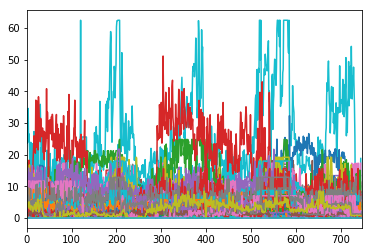

In [601]:
## 画出用户日用电量时序图，x轴为时间点
for i in range(len(df_new)):
    plt.plot(np.array(df_new.iloc[i,1:]))
plt.xlim(0,747)

(0, 747)

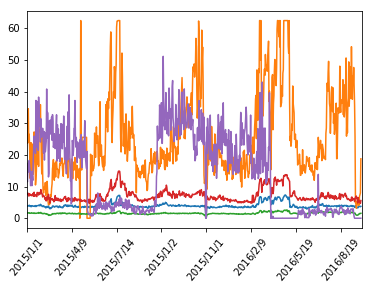

In [592]:
#使用k-means进行聚类分析并画出类中心时序图：
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(df_new.iloc[:,1:])
# kmeans.labels_
# c=kmeans.cluster_centers_
for i in range(5):   
    plt.plot(kmeans.cluster_centers_[i])

plt.xticks([0.,100.,200.,300.,400.,500.,600.,700.],
           [r'$2015/1/1$',r'$2015/4/9$',r'$2015/7/14$',r'$2015/1/2$',r'$2015/11/1$',r'$2016/2/9$',r'$2016/5/19$',r'$2016/8/19$'])
plt.xticks(rotation = 50)
plt.xlim(0,747)